In [1]:
# Importera nödvändiga bibliotek
from sqlalchemy import create_engine, inspect
from prettytable import PrettyTable
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy.stats as stats
from scipy.stats import t, ttest_ind

In [2]:
# Skapa en anslutning till AdventureWorks2022-databasen med SQLAlchemy 
engine = create_engine('mssql://GIRLIEQUINDAORA/AdventureWorks2022?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server')
connection = engine.connect()

print(type(connection))

<class 'sqlalchemy.engine.base.Connection'>


## SQL Query to Analyze Vendor Performance:

In [3]:
# Hämta POH.VendorID, PV.BusinessEntityID, V.Name(VendorName), V.ActiveFlag, V.PreferredVendorStatus, 
# P.ProductID, P.Name, POD.UnitPrice, POH.TaxAmt, POH.Freight, PV.AverageLeadTime & V.CreditRating 
vendor_performance_query = """
    SELECT 
    POH.VendorID,
    PV.BusinessEntityID,
    V.Name AS VendorName,
    V.ActiveFlag AS VendorActiveFlagStatus,
    V.PreferredVendorStatus,
    P.ProductID,
    P.Name AS ProductName,
    AVG(POD.UnitPrice) AS AvgUnitPrice,
    AVG(POH.TaxAmt) AS AvgTaxAmt,
    AVG(POH.Freight) AS AvgFreight,
    AVG(PV.AverageLeadTime) AS AvgDeliveryTime,
    V.CreditRating AS VendorPerformanceRating
FROM 
    Purchasing.PurchaseOrderHeader AS POH
INNER JOIN 
    Purchasing.PurchaseOrderDetail AS POD 
    ON POH.PurchaseOrderID = POD.PurchaseOrderID
INNER JOIN
    Purchasing.ProductVendor AS PV
    ON POD.ProductID = PV.ProductID
INNER JOIN
    Purchasing.Vendor AS V
    ON PV.BusinessEntityID = V.BusinessEntityID
INNER JOIN
    Production.Product AS P
    ON PV.ProductID = P.ProductID
GROUP BY
    POH.VendorID,
    PV.BusinessEntityID,
    V.Name,
    V.ActiveFlag,
    V.PreferredVendorStatus,
    P.ProductID,
    P.Name,
    V.CreditRating;

"""
# Samla eller lagra Vendor Performance SQL Query till Pandas DataFrame
vendor_performance_data = pd.read_sql_query(vendor_performance_query, engine)

# För att visa alla kolumner och rader
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Skriva ut eller visa kolumner som har i sql query
display(vendor_performance_data)

,VendorID,BusinessEntityID,VendorName,VendorActiveFlagStatus,PreferredVendorStatus,ProductID,ProductName,AvgUnitPrice,AvgTaxAmt,AvgFreight,AvgDeliveryTime,VendorPerformanceRating
0,1492,1492,Australia Bike Retailer,True,True,422,Thin-Jam Lock Nut 9,47.52,39.49,12.34,17,1
1,1492,1492,Australia Bike Retailer,True,True,423,Thin-Jam Lock Nut 10,45.42,39.49,12.34,17,1
2,1492,1492,Australia Bike Retailer,True,True,424,Thin-Jam Lock Nut 1,49.70,43.50,13.59,17,1
3,1492,1492,Australia Bike Retailer,True,True,425,Thin-Jam Lock Nut 2,45.42,43.50,13.59,17,1
4,1492,1492,Australia Bike Retailer,True,True,426,Thin-Jam Lock Nut 15,43.32,51.14,15.98,17,1
5,1492,1492,Australia Bike Retailer,True,True,427,Thin-Jam Lock Nut 16,47.60,45.40,14.19,17,1
6,1492,1492,Australia Bike Retailer,True,True,428,Thin-Jam Lock Nut 5,43.32,45.40,14.19,17,1
7,1492,1492,Australia Bike Retailer,True,True,429,Thin-Jam Lock Nut 6,41.22,54.42,17.01,17,1
8,1492,1492,Australia Bike Retailer,True,True,430,Thin-Jam Lock Nut 3,45.50,54.42,17.01,17,1
9,1492,1492,Australia Bike Retailer,True,True,431,Thin-Jam Lock Nut 4,41.22,54.42,17.01,17,1


## Visualize AvgUnitPrice by VendorPerformanceRating, ActiveFlag, and Preferred Status
#### UnitPrice = Vendor's selling price of a single product
#### CreditRatng = ( 1 = Superior, 2 = Excellent, 3 = Above average, 4 = Average, 5 = Below average)
#### ActiveFlag = (0 or False = Vendor no longer used,  1 or True = Vendor is actively used. Default: 1)
#### PreferredVendorStatus = (0 or False = Do not use if another vendor is available. 1 or True = Preferred over other vendors supplying the same product. Default: 1)

Reference: https://dataedo.com/download/AdventureWorks.pdf

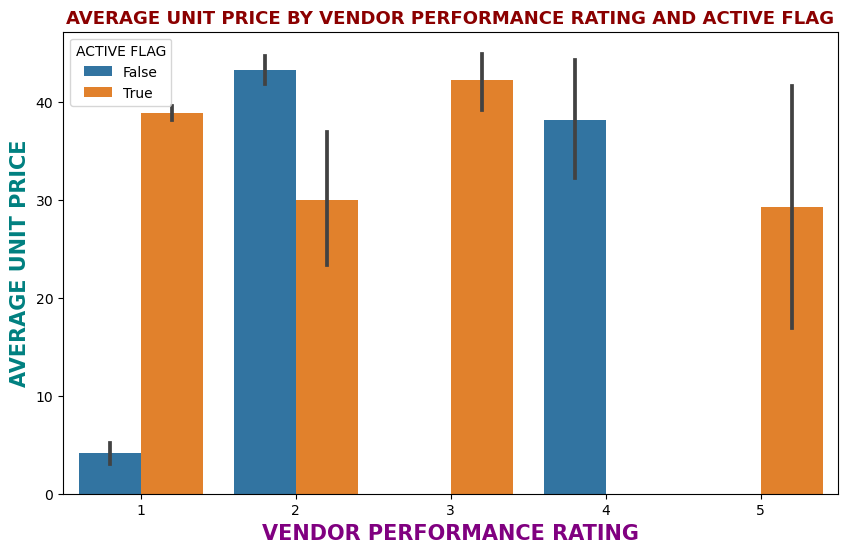

In [4]:
# Använd matplotlib och seaborn för att skapa ett stapeldiagram med flera kategorier baserat på 'VendorPerformanceRating', 
# 'AvgUnitPrice' och 'VendorActiveFlagStatus' från vendor_performance_data. 

# Skapa ett stapeldiagram med flera kategorier
plt.figure(figsize=(10, 6))
sns.barplot(x='VendorPerformanceRating', y='AvgUnitPrice', hue='VendorActiveFlagStatus', data=vendor_performance_data)
plt.xlabel('VENDOR PERFORMANCE RATING', size='15', color='purple', weight='1000')
plt.ylabel('AVERAGE UNIT PRICE', size='15', color='teal', weight='1000')
plt.title('AVERAGE UNIT PRICE BY VENDOR PERFORMANCE RATING AND ACTIVE FLAG', size='13', color='darkred', weight='1000')
plt.legend(title='ACTIVE FLAG')
plt.show()


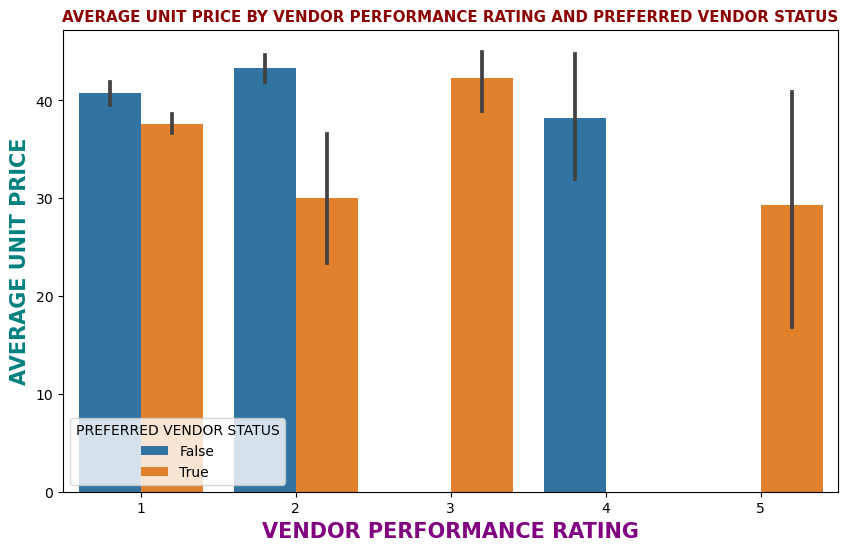

In [5]:
# Skapa ett stapeldiagram med flera kategorier genom att använda sns.barplot() från Seaborn-biblioteket. Det visualiserar 
# genomsnittliga enhetspriser för olika leverantörsprestanda betygsnivåer med hänsyn till deras föredragna status.

# Skapa ett stapeldiagram med flera kategorier
plt.figure(figsize=(10, 6))
sns.barplot(x='VendorPerformanceRating', y='AvgUnitPrice', hue='PreferredVendorStatus', data=vendor_performance_data)
plt.xlabel('VENDOR PERFORMANCE RATING', size='15', color='purple', weight='1000')
plt.ylabel('AVERAGE UNIT PRICE', size='15', color='teal', weight='1000')
plt.title('AVERAGE UNIT PRICE BY VENDOR PERFORMANCE RATING AND PREFERRED VENDOR STATUS', size='10.8', color='darkred', weight='1000')
plt.legend(title='PREFERRED VENDOR STATUS')
plt.show()

### Calculate Confidence Intervals for Average Unit Price by Vendor Credit Rating & Preferred Vendor Status

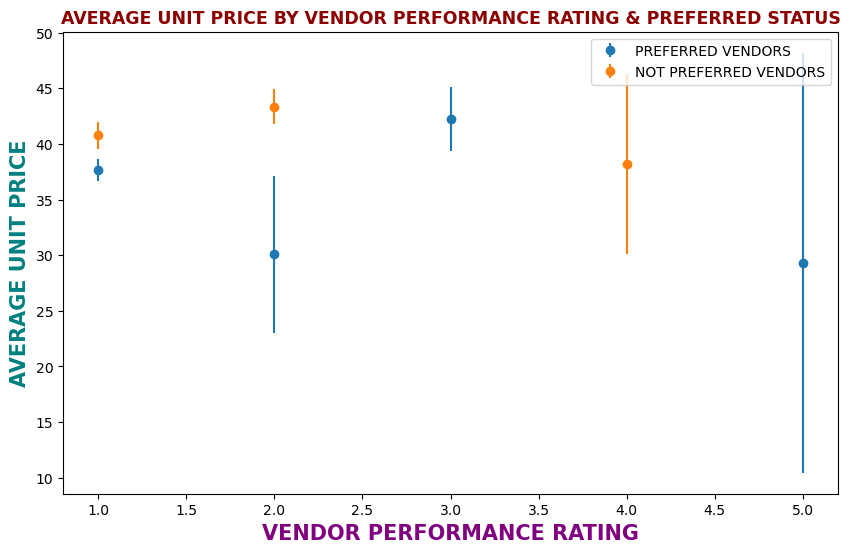

'T-statistic: -3.9173'

'P-value: 0.0001'

'Avvisa nollhypotesen (H0)! Det finns en signifikant skillnad i genomsnittliga enhetspriser.'

In [6]:
# Analysera föredragna och icke-föredragna leverantörer, beräknar konfidensintervall för genomsnittliga enhetspriser, 
# utför en hypotesprövning, visualiserar konfidensintervallen och visar resultaten.

# Separera data för föredragna och icke-föredragna leverantörer
preferred_vendors = vendor_performance_data[vendor_performance_data['PreferredVendorStatus'] == True]
not_preferred_vendors = vendor_performance_data[vendor_performance_data['PreferredVendorStatus'] == False]

# display(preferred_vendors, not_preferred_vendors)

#  Beräkna konfidensintervall för genomsnittligt enhetspris baserat på leverantörsprestandabetyg för föredragna leverantörer
ci_preferred = preferred_vendors.groupby('VendorPerformanceRating')['AvgUnitPrice'].agg(stats.sem, ddof=1) * \
               stats.t.ppf((1 + 0.95) / 2, preferred_vendors.groupby('VendorPerformanceRating')['AvgUnitPrice'].count() - 1)

# Beräkna konfidensintervall för genomsnittligt enhetspris baserat på leverantörsprestandabetyg för icke-föredragna leverantörer
ci_not_preferred = not_preferred_vendors.groupby('VendorPerformanceRating')['AvgUnitPrice'].agg(stats.sem, ddof=1) * \
                   stats.t.ppf((1 + 0.95) / 2, not_preferred_vendors.groupby('VendorPerformanceRating')['AvgUnitPrice'].count() - 1)

# display(ci_preferred, ci_not_preferred)

# Hypotesprövning mellan föredragna status = true och icke-föredragna = false
t_stat, p_value = stats.ttest_ind(preferred_vendors['AvgUnitPrice'], not_preferred_vendors['AvgUnitPrice'])

# display(t_stat, p_value)

# Visualisera konfidensintervall
plt.figure(figsize=(10, 6))
plt.errorbar(ci_preferred.index, preferred_vendors.groupby('VendorPerformanceRating')['AvgUnitPrice'].mean(),
             yerr=ci_preferred.values, label='PREFERRED VENDORS', fmt='o')
plt.errorbar(ci_not_preferred.index, not_preferred_vendors.groupby('VendorPerformanceRating')['AvgUnitPrice'].mean(),
             yerr=ci_not_preferred.values, label='NOT PREFERRED VENDORS', fmt='o')
plt.xlabel('VENDOR PERFORMANCE RATING', size='15', color='purple', weight='1000')
plt.ylabel('AVERAGE UNIT PRICE', size='15', color='teal', weight='1000')
plt.title('AVERAGE UNIT PRICE BY VENDOR PERFORMANCE RATING & PREFERRED STATUS', size='12.5', color='darkred', weight='1000')
plt.legend()
plt.show()

# Visa resultaten
display(f"T-statistic: {t_stat:.4f}", f"P-value: {p_value:.4f}")

# Avgör om H0 ska avvisas eller inte och skriv ut resultatet
if p_value <= 0.05:
    display("Avvisa nollhypotesen (H0)! Det finns en signifikant skillnad i genomsnittliga enhetspriser.")
else:
    display("Misslyckades att avvisa nollhypotesen (H0)! Det kanske inte finns en signifikant skillnad i genomsnittliga enhetspriser.")

## Contact Informations of Preferred and Not Preferred Vendor Status

In [7]:
# Hämta adress och kontakt informationer om leverantörer med 'Önskad' = TRUE ; 'Inte önskad' = FALSE
vendor_contact_informations_query = """
    SELECT 
        vVA.*,  
        V.PreferredVendorStatus,
        vVC.ContactType,
        vVC.Title,
        vVC.FirstName,
        vVC.MiddleName,
        vVC.LastName,
        vVC.PhoneNumber,
        vVC.PhoneNumberType,
        vVC.EmailAddress,
        vVC.EmailPromotion
    FROM
        Purchasing.vVendorWithAddresses AS vVA
    INNER JOIN
        Purchasing.Vendor AS V
        ON vVA.BusinessEntityID = V.BusinessEntityID
    INNER JOIN
        Purchasing.vVendorWithContacts AS vVC
        ON V.BusinessEntityID = vVC.BusinessEntityID 
    WHERE 
        V.PreferredVendorStatus IN ('True', 'False')
    ORDER BY
        V.PreferredVendorStatus;
"""

# Kör SQL-frågor och spara till Pandas DataFrame
vendor_contact_informations_data = pd.read_sql_query(vendor_contact_informations_query, engine)

# Ange visningsalternativ för att visa alla rader och kolumner
pd.set_option('display.max_rows', None)  # Visa alla rader
pd.set_option('display.max_columns', None)  # Visa alla kolumner

# Skriv ut / Visa / Läs resultat / Utdata
display(vendor_contact_informations_data)

,BusinessEntityID,Name,AddressType,AddressLine1,AddressLine2,City,StateProvinceName,PostalCode,CountryRegionName,PreferredVendorStatus,ContactType,Title,FirstName,MiddleName,LastName,PhoneNumber,PhoneNumberType,EmailAddress,EmailPromotion
0,1554,WestAmerica Bicycle Co.,Main Office,8040 Erie Dr,6 Monteira,Houston,Texas,77003,United States,False,Sales Agent,Mr.,Tim,None,O'Brien,360-555-0100,Work,tim1@adventure-works.com,1
1,1516,Gardner Touring Cycles,Main Office,8513 Hurlstone Ct.,None,Altadena,California,91001,United States,False,Sales Associate,Mr.,Michael,J.,Zwilling,542-555-0100,Cell,michael28@adventure-works.com,2
2,1602,Beaumont Bikes,Main Office,2472 Alexander Place,None,West Covina,Idaho,83301,United States,False,Sales Agent,Mr.,John,None,Peoples,943-555-0100,Cell,john26@adventure-works.com,1
3,1602,Beaumont Bikes,Main Office,2472 Alexander Place,None,West Covina,Idaho,83301,United States,False,Sales Associate,Mr.,Peng,None,Wu,306-555-0100,Work,peng1@adventure-works.com,0
4,1604,Bike Satellite Inc.,Main Office,2141 Delaware Ct.,None,Downey,Tennessee,37501,United States,False,Sales Associate,Mr.,Jonathan,None,Perera,404-555-0100,Cell,jonathan1@adventure-works.com,1
5,1666,Leaf River Terrain,Main Office,1619 Mills Dr.,None,Albany,Oregon,97321,United States,False,Sales Agent,Ms.,Michelle,B.,Rector,459-555-0100,Cell,michelle1@adventure-works.com,1
6,1686,Pro Sport Industries,Main Office,6360 Sand Pointe Lane,None,Coronado,California,92118,United States,False,Sales Manager,Mr.,Dave,None,Richards,582-555-0100,Work,dave1@adventure-works.com,0
7,1656,Mountain Works,Main Office,8 Rogers Ave.,None,Everett,Washington,98201,United States,False,Sales Associate,Ms.,Cynthia,None,Randall,961-555-0100,Work,cynthia1@adventure-works.com,2
8,1678,"Proseware, Inc.",Main Office,50 Big Canyon Road,None,Lebanon,Oregon,97355,United States,False,Sales Manager,Mr.,Eric,E.,Rhodes,113-555-0100,Work,eric8@adventure-works.com,2
9,1516,Gardner Touring Cycles,Main Office,8513 Hurlstone Ct.,None,Altadena,California,91001,United States,False,Sales Manager,Mr.,Salman,None,Mughal,882-555-0100,Work,salman0@adventure-works.com,1
